# QUESTIONS

In the TMDb movie data analysis we will investige the following data

- How the popularity of the movie varies across different years.
- How the budget of the movies varies across different years.

In [40]:

"""
 created by deepak 
 description importing the libraries used for the movie data analysis
"""
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [55]:
"""
 created by deepak 
 description data frame for reading all the movie list created and seeing the top data on the list using the head function
 """
movie_df=pd.read_csv('tmdb-movies.csv')
movie_df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,06-09-2015,5562,6.5,2015,137999939.3,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,137999939.3,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,101199955.5,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,183999919.0,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,04-01-2015,2947,7.3,2015,174799923.1,1.385749e+09


In [53]:
"""
created by deepak
description creating a data frame by grouping the movie by release year and taking the mean of each year data 
"""
data_movie=movie_df.groupby(['release_year'],as_index=False).mean()
data_movie.head()

,release_year,id,popularity,budget,revenue,runtime,vote_count,vote_average,budget_adj,revenue_adj
0,1960,15715.281250,0.458932,6.892796e+05,4.531406e+06,110.656250,77.531250,6.325000,5.082036e+06,3.340991e+07
1,1961,18657.000000,0.422827,1.488290e+06,1.089420e+07,119.419355,77.580645,6.374194,1.085687e+07,7.947167e+07
2,1962,17001.062500,0.454783,1.710066e+06,6.736870e+06,124.343750,74.750000,6.343750,1.232693e+07,4.856238e+07
3,1963,16556.000000,0.502706,2.156809e+06,5.511911e+06,111.323529,82.823529,6.329412,1.535687e+07,3.924580e+07
4,1964,17379.571429,0.412428,9.400753e+05,8.118614e+06,109.214286,74.690476,6.211905,6.608980e+06,5.707603e+07


# Scatter Plot (Release Year, Popularity)
The graph plots the average popularity of the movies in different years.

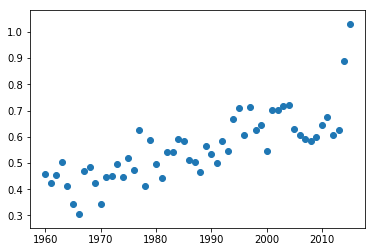

In [42]:
plt.scatter(data_movie['release_year'],data_movie['popularity'])

# Conclusions
From the above graph we can conclude that the average popularity of the movies have increased over the time

# Bar Graph(Release Year, Budget)
The bar graph shows the average budget of the movies across different year

<Container object of 56 artists>

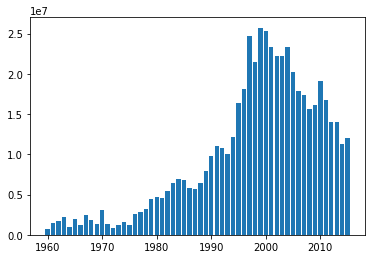

In [43]:
plt.bar(data_movie['release_year'],data_movie['budget'])

# Conclusion
The graph shows that the average budget of the movies have increased from mid 90's in the preceedings year.

#    # Data Wrangling And Cleaning


In [59]:
"""
created by deepak
The data contains the fields where the budget,revenue are not provided, so we are removing the lower bound outlieres from our
data frame

It is also very hard to consider the movies where the vote count is less than 100
"""
movie_budget_df=movie_df[movie_df.budget>100]
movie_budget_df=movie_budget_df[movie_budget_df.revenue>100]
movie_budget_df=movie_budget_df[movie_budget_df.vote_count>100]

movie_budget_df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,06-09-2015,5562,6.5,2015,137999939.3,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,137999939.3,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,101199955.5,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,183999919.0,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,04-01-2015,2947,7.3,2015,174799923.1,1.385749e+09


# Scatter Plot(Revenue, Vote Average)
The graph shows how the vote average as per the revenue of the movies

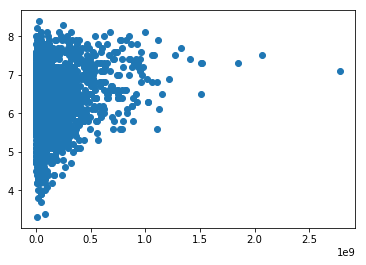

In [57]:
plt.scatter(movie_budget_df['revenue'],movie_budget_df['vote_average'])

# Conclusions
It is very hard to tell if the revenue is completely dependent on the vote average.

In [60]:
"""
created by deepak
description the method taked the list and send the list after standardizing it by performing the vectorized operations to it.
"""
def standard_list(list_to_standardize):
    mean=list_to_standardize.mean()
    sd=list_to_standardize.std()
    return (list_to_standardize-mean)/sd

In [51]:
"""
created by deepak
description The total gain of the movies by taking the difference of revenue and the budget of the movies 
"""
gain_list=movie_budget_df['revenue']-movie_budget_df['budget']
gain_list.describe()

count    2.598000e+03
mean     1.034365e+08
std      1.730138e+08
min     -1.657101e+08
25%      9.930207e+06
50%      4.994628e+07
75%      1.274610e+08
max      2.544506e+09
dtype: float64

In [61]:
"""
created by deepak
description calling the function and showing the profit or loss in standard form
"""
standard_list(gain_list)

0         7.283190
1         0.722485
2         0.472804
3        10.200006
4         7.009920
5         1.702257
6         1.052905
7         2.219152
8         5.660210
9         3.325007
10        3.076276
11       -0.551683
12       -0.471449
13        0.301713
14        5.904727
15        0.048110
16        1.007636
17        1.648225
18        1.987789
19        2.237318
20       -0.487827
21       -0.241175
22        1.485745
23        2.463474
24        0.011040
25        2.478956
26        0.256784
27        1.267908
28       -0.202816
29        0.848605
           ...    
10519    -0.403161
10589    -0.634722
10593    -0.499267
10594     1.906609
10595     0.296747
10596    -0.583402
10597    -0.082574
10601     0.292924
10606     0.062345
10608    -0.359333
10611    -0.442950
10648    -0.299174
10649    -0.505375
10650    -0.146442
10653    -0.148176
10689     0.154665
10690     0.298114
10691    -0.033030
10724    -0.164507
10725    -0.041197
10727    -0.359806
10728    -0.